In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the dataset
# head =  none, tell dataset there no columns name is present show don't takes first rows as the header as columns
# Names = manually give the name to the columns where there is not by defualt  columns  name  is present in the table
# usecols = [0,1]  This argument specifies that only the first two columns (index 0 and 1) from the CSV file should be read.

nf =pd.read_csv('/content/drive/MyDrive/Netflix dataset-20250719T084144Z-1-001/Netflix dataset/combined_data_1.txt/combined_data_1.txt', header = None , names = ['Cust_Id', 'Rating'], usecols = [0,1])




In [3]:
# Checking the Shape of Dataset
nf.shape

(24058263, 2)

In [4]:
# it will helps us to finded the what type of the data is dataset
nf.dtypes

,0
Cust_Id,object
Rating,float64


In [5]:
# Checking the shape of the dataset
nf.shape

(24058263, 2)

In [6]:
# print first 5 rows of dataset throught head
nf.head()
# 1:----> 1st Movies

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [7]:
# get movie count by counting nan value
movie_count = nf["Rating"].isnull().sum()
movie_count
#4499 total number of movies present in dataset

4499

In [8]:
# get customers count
Cust_count = nf['Cust_Id'].nunique()-movie_count
Cust_count

470758

In [9]:
#Get rating count
rating_count = nf.count()[0]-movie_count
rating_count

24053764

In [10]:
# Checking the maverage rating by per person on movies
Cust_count = 470758
rating_count= 24053764
Average_per_movie_rated = rating_count / Cust_count
Average_per_movie_rated

51.09581568449182

In [11]:
# Checking the distribution of the data on the basics of Rating
Stars = nf.groupby("Rating")["Rating"].agg(['count'])
Stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


## To plot the distribution of the ratings in as a bar plot

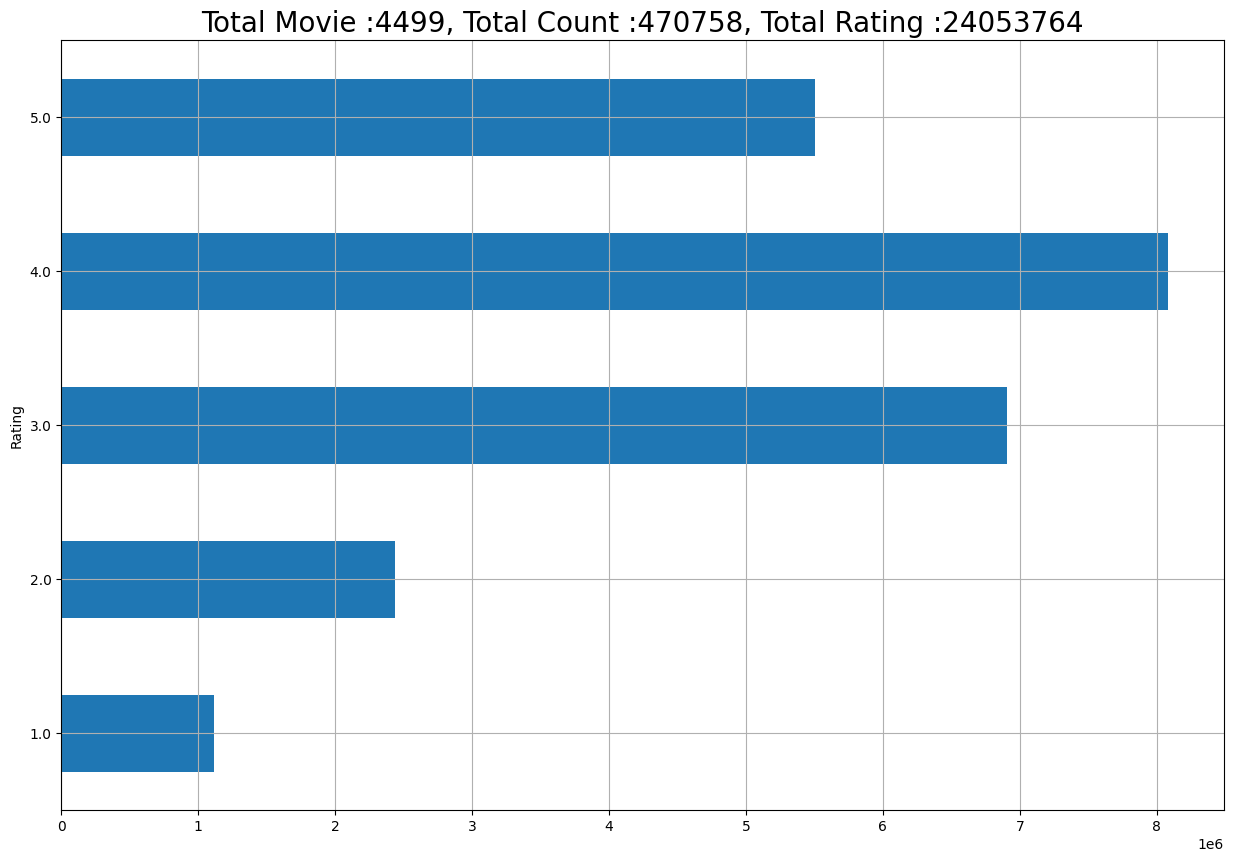

In [12]:
ax = Stars.plot(kind = 'barh',legend = False ,figsize = (15,10))
plt.title (f'Total Movie :{movie_count}, Total Count :{Cust_count}, Total Rating :{rating_count}',fontsize = 20)
plt.grid()
plt.show()

In [13]:
# Creating the a new col in movies id

movie_Id = None

movie_np = []


for i in nf["Cust_Id"]:
  if ":" in i:
    movie_id = int(i.replace(":",""))
  movie_np.append(movie_id)



In [14]:
# adding Movie_id on nf Dataset
nf["Movie_id"]=movie_np

In [15]:
# Drop null values
nf.dropna(inplace = True)
nf

,Cust_Id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [16]:
# Checking Datatype of date
nf.dtypes

,0
Cust_Id,object
Rating,float64
Movie_id,int64


In [17]:
# Changing the object dtype to into int
nf["Cust_Id"] =nf["Cust_Id"].astype(int)

In [18]:
# Pre Fitering
# Removing the Customers who have given less ratings
# Removing all the movies which are having less ratings

In [19]:
# Count the rating of every movie_id
per_movie_rating = nf.groupby("Movie_id")["Rating"].agg(["count"])
per_movie_rating

,count
Movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [20]:
movie_benchmark = round(per_movie_rating['count'].quantile(0.6),0) # Percentile percent is totaly depend on ourself to decide
movie_benchmark

908.0

In [21]:
# if the benchmark is less then 908, it has to be removed from the data for better result
drop_movie_list = per_movie_rating[per_movie_rating["count"] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_id', length=2699)

In [22]:
 len(drop_movie_list)

2699

In [23]:
# Removing the customers who have rated less movies
per_cust_rating = nf.groupby("Cust_Id")["Rating"].agg(['count'])
per_cust_rating

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [24]:
cust_benchmark = round(per_cust_rating["count"].quantile(0.6),0)
cust_benchmark

36.0

In [25]:
drop_cust_list = per_cust_rating[per_cust_rating["count"] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [26]:
len(drop_cust_list)

282042

In [27]:
nf = nf[~ nf["Movie_id"].isin(drop_movie_list)]   # Please consider iclude all the data of movie_id execpt the data in drop_movie_list
nf = nf[~ nf["Cust_Id"].isin(drop_cust_list )]

In [28]:
nf

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# Model Building

In [29]:
# Loading the secomd dataset where movies names are given
nf_title = pd.read_csv("/content/drive/MyDrive/Netflix dataset-20250719T084144Z-1-001/Netflix dataset/movie_titles.csv",encoding = 'ISO-8859-1',header = None , names = ['Movie_Id', 'Year','Title'],usecols =[0,1,2])

In [30]:
nf_title

,Movie_Id,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [31]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [32]:
# # to fix svd downgrading the given library

!pip install scikit-surprise
!pip uninstall numpy -
!pip install numpy==1.26.4

ERROR: Invalid requirement: '-': Expected package name at the start of dependency specifier
    -
    ^


In [33]:
print(np.__version__)

1.26.4


In [34]:
reader =Reader()

In [35]:
# reader will Make Data into readeable format for svd
data =Dataset.load_from_df(nf[["Cust_Id","Movie_id","Rating"]][:100000],reader)

In [36]:
 data

In [37]:
svd = SVD()

In [38]:
 # Cross validation is a technique used test how well model is working on unseen data -- avoid fitting
 cross_validate(svd,data,measures =["RMSE"], cv= 3) # Training the svd

{'test_rmse': array([1.01415113, 1.02307164, 1.01964484]),
 'fit_time': (1.509488582611084, 2.476078748703003, 4.747802019119263),
 'test_time': (0.6539609432220459, 0.7385866641998291, 0.5322163105010986)}

In [39]:
nf

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# **Recommendation**

In [40]:
User_rating = nf[nf["Cust_Id"]==656399]
User_rating       # User656399 has rated 64 movies

,Cust_Id,Rating,Movie_id
700,656399,4.0,3
313860,656399,3.0,83
531242,656399,2.0,156
577666,656399,4.0,175
938038,656399,4.0,206
...,...,...,...
23809726,656399,2.0,4441
23831660,656399,2.0,4460
23951288,656399,4.0,4478
23953869,656399,3.0,4479


In [41]:
User656399 = nf_title.copy()
User656399

,Movie_Id,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [42]:
 User656399 = User656399[~User656399["Movie_Id"].isin(drop_movie_list)]
 User656399

,Movie_Id,Year,Title
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [47]:
# Predication

User656399['Estimated_Score']= User656399["Movie_Id"].apply(lambda x:svd.predict(656399,x).est)
User656399

,Movie_Id,Year,Title,Estimated_Score
2,3,1997.0,Character,3.714900
4,5,2004.0,The Rise and Fall of ECW,4.232086
5,6,1997.0,Sick,3.003891
7,8,2004.0,What the #$*! Do We Know!?,3.280718
15,16,1996.0,Screamers,3.212725
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.624302
17766,17767,2004.0,Fidel Castro: American Experience,3.624302
17767,17768,2000.0,Epoch,3.624302
17768,17769,2003.0,The Company,3.624302


In [46]:
User656399.sort_values("Estimated_Score",ascending = False)

,Movie_Id,Year,Title,Estimated_Score
4,5,2004.0,The Rise and Fall of ECW,4.232086
29,30,2003.0,Something's Gotta Give,3.768723
27,28,2002.0,Lilo and Stitch,3.735378
2,3,1997.0,Character,3.714900
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.681848
...,...,...,...,...
15,16,1996.0,Screamers,3.212725
16,17,2005.0,7 Seconds,3.174117
5,6,1997.0,Sick,3.003891
25,26,2004.0,Never Die Alone,2.775774
